In [7]:
import pandas as pd
from scipy.stats import binom_test

# 读取Excel文件中的数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet1')

# 计算总人数中各个字段中缓解的比例
total_rswg_remission_rate = (data['RSWG Remission criteria'] == 1).mean()
total_panss_25_reduction_rate = (data['25%  total PANSS reduction'] == 1).mean()
total_panss_35_reduction_rate = (data['35%  total PANSS reduction'] == 1).mean()
total_panss_50_reduction_rate = (data['50%  total PANSS reduction'] == 1).mean()

# 筛选出 "secondary negative symptom" 字段中值为1(没有转变)的患者
no_transition_patients = data[data['secondary negative symptom'] == 1]

# 计算这些患者在各个字段中缓解的比例
rswg_remission_rate = (no_transition_patients['RSWG Remission criteria'] == 1).mean()
panss_25_reduction_rate = (no_transition_patients['25%  total PANSS reduction'] == 1).mean()
panss_35_reduction_rate = (no_transition_patients['35%  total PANSS reduction'] == 1).mean()
panss_50_reduction_rate = (no_transition_patients['50%  total PANSS reduction'] == 1).mean()

# 进行二项分布检验
rswg_p_value = binom_test(rswg_remission_rate * len(no_transition_patients), n=len(no_transition_patients), p=total_rswg_remission_rate)
panss_25_p_value = binom_test(panss_25_reduction_rate * len(no_transition_patients), n=len(no_transition_patients), p=total_panss_25_reduction_rate)
panss_35_p_value = binom_test(panss_35_reduction_rate * len(no_transition_patients), n=len(no_transition_patients), p=total_panss_35_reduction_rate)
panss_50_p_value = binom_test(panss_50_reduction_rate * len(no_transition_patients), n=len(no_transition_patients), p=total_panss_50_reduction_rate)

# 打印结果
print(f"在没有转变为次发症状的患者中:")
print(f"{rswg_remission_rate:.2%} 达到了RSWG缓解标准 (p = {rswg_p_value:.3f})")
print(f"{panss_25_reduction_rate:.2%} 达到了PANSS总分减少25%的标准 (p = {panss_25_p_value:.3f})")
print(f"{panss_35_reduction_rate:.2%} 达到了PANSS总分减少35%的标准 (p = {panss_35_p_value:.3f})")
print(f"{panss_50_reduction_rate:.2%} 达到了PANSS总分减少50%的标准 (p = {panss_50_p_value:.3f})")

在没有转变为次发症状的患者中:
61.54% 达到了RSWG缓解标准 (p = 0.547)
69.23% 达到了PANSS总分减少25%的标准 (p = 0.297)
61.54% 达到了PANSS总分减少35%的标准 (p = 1.000)
7.69% 达到了PANSS总分减少50%的标准 (p = 0.490)


In [8]:
import pandas as pd
from scipy.stats import fisher_exact

# 读取Excel文件中的数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet1')

# 筛选出 "secondary negative symptom" 字段中值为1(没有转变)和0(转变)的患者
no_transition_patients = data[data['secondary negative symptom'] == 1]
transition_patients = data[data['secondary negative symptom'] == 0]

# 定义函数来进行Fisher精确检验并打印结果
def compare_remission_rates(criterion):
    contingency_table = pd.crosstab(data['secondary negative symptom'], data[criterion] == 1)
    _, p_value = fisher_exact(contingency_table)
    print(f"{criterion}:")
    print(f"没有转变为次发症状的患者: {(no_transition_patients[criterion] == 1).mean():.2%} ({(no_transition_patients[criterion] == 1).sum()}/{len(no_transition_patients)})")
    print(f"转变为次发症状的患者: {(transition_patients[criterion] == 1).mean():.2%} ({(transition_patients[criterion] == 1).sum()}/{len(transition_patients)})")
    print(f"Fisher精确检验p值: {p_value:.3f}\n")

# 对各个缓解标准进行比较
compare_remission_rates('RSWG Remission criteria')
compare_remission_rates('25%  total PANSS reduction')
compare_remission_rates('35%  total PANSS reduction')
compare_remission_rates('50%  total PANSS reduction')

RSWG Remission criteria:
没有转变为次发症状的患者: 61.54% (8/13)
转变为次发症状的患者: 71.88% (46/64)
Fisher精确检验p值: 0.513

25%  total PANSS reduction:
没有转变为次发症状的患者: 69.23% (9/13)
转变为次发症状的患者: 82.81% (53/64)
Fisher精确检验p值: 0.267

35%  total PANSS reduction:
没有转变为次发症状的患者: 61.54% (8/13)
转变为次发症状的患者: 56.25% (36/64)
Fisher精确检验p值: 0.769

50%  total PANSS reduction:
没有转变为次发症状的患者: 7.69% (1/13)
转变为次发症状的患者: 23.44% (15/64)
Fisher精确检验p值: 0.280



In [9]:
import pandas as pd
from scipy.stats import binom_test
# 读取Excel文件中的数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet2')

# 计算急性期患者的比例
acute_patients = data[data['Illness of duration (years)'] <= 2]
acute_percentage = len(acute_patients) / len(data) * 100

# 计算慢性期患者的比例
chronic_patients = data[data['Illness of duration (years)'] > 2]
chronic_percentage = len(chronic_patients) / len(data) * 100

# 打印结果
print(f"急性期患者: {acute_percentage:.2f}%")
print(f"慢性期患者: {chronic_percentage:.2f}%")
print(f"入院时病程中位数: {data['Illness of duration (years)'].median()} 年")

急性期患者: 6.98%
慢性期患者: 93.02%
入院时病程中位数: 7.583333333333334 年


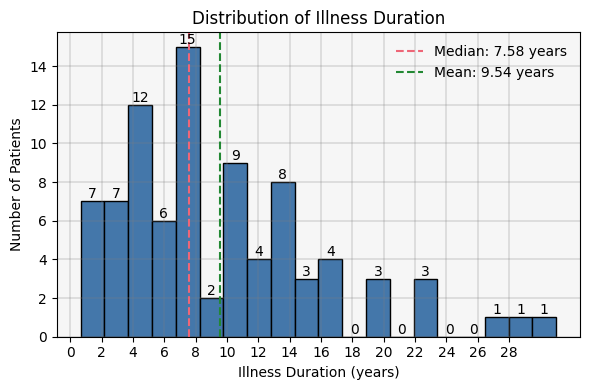

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件中的数据
data = pd.read_excel('rawdata.xlsx', sheet_name='Sheet2')

# 设置Nature风格的配色方案
nature_colors = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

# 绘制病程分布的直方图
plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(data['Illness of duration (years)'], bins=20, edgecolor='black', color=nature_colors[0])
plt.xlabel('Illness Duration (years)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Illness Duration')

# 设置x轴刻度
plt.xticks(range(0, 30, 2))

# 添加中位数垂直线
median_duration = data['Illness of duration (years)'].median()
plt.axvline(median_duration, color=nature_colors[1], linestyle='--', label=f'Median: {median_duration:.2f} years')

# 添加均值垂直线
mean_duration = data['Illness of duration (years)'].mean()
plt.axvline(mean_duration, color=nature_colors[2], linestyle='--', label=f'Mean: {mean_duration:.2f} years')

# 在柱状图上方添加人数标签
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2., patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', color='black')

plt.legend(frameon=False)
plt.tight_layout()

# 设置背景颜色和网格
plt.gca().set_facecolor('#F6F6F6')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

# 以600 DPI的分辨率保存图形为PNG文件
plt.savefig('illness_duration_distribution.jpg', dpi=600)

plt.show()

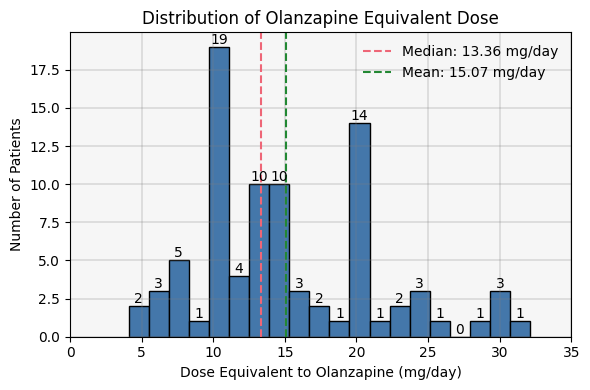

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件中的数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet2')

# 设置Nature风格的配色方案
nature_colors = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

# 绘制剂量分布的直方图
plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(data['Dose Equivalent to Olanzapine (mg/d)'], bins=20, edgecolor='black', color=nature_colors[0])
plt.xlabel('Dose Equivalent to Olanzapine (mg/day)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Olanzapine Equivalent Dose')

# 设置x轴刻度
max_dose = max(data['Dose Equivalent to Olanzapine (mg/d)'])
plt.xticks(range(0, int(max_dose) + 5, 5))

# 添加中位数垂直线
median_dose = data['Dose Equivalent to Olanzapine (mg/d)'].median()
plt.axvline(median_dose, color=nature_colors[1], linestyle='--', label=f'Median: {median_dose:.2f} mg/day')

# 添加均值垂直线
mean_dose = data['Dose Equivalent to Olanzapine (mg/d)'].mean()
plt.axvline(mean_dose, color=nature_colors[2], linestyle='--', label=f'Mean: {mean_dose:.2f} mg/day')

# 在柱状图上方添加人数标签
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2., patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', color='black')

plt.legend(frameon=False)
plt.tight_layout()

# 设置背景颜色和网格
plt.gca().set_facecolor('#F6F6F6')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

# 以600 DPI的分辨率保存图形为PNG文件
plt.savefig('olanzapine_equivalent_dose_distribution.jpg', dpi=600)

plt.show()

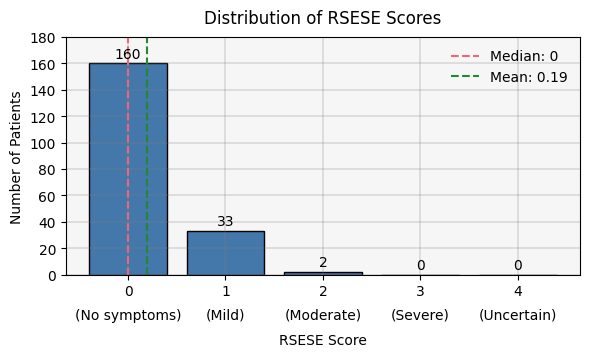

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
data = pd.read_excel('RSESE_scores.xlsx')

# Set Nature-style color scheme
nature_colors = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

# Plot histogram of RSESE scores
plt.figure(figsize=(6, 4))
score_counts = data['RSESE评分'].value_counts().sort_index()
score_counts = score_counts.reindex(range(5), fill_value=0)
plt.bar(score_counts.index, score_counts.values, edgecolor='black', color=nature_colors[0])
plt.xlabel('RSESE Score', labelpad=25)
plt.ylabel('Number of Patients')
plt.title('Distribution of RSESE Scores', pad=10)

# Set x-axis ticks and labels
plt.xticks(range(5), ['0', '1', '2', '3', '4'])

# Set y-axis ticks and range
plt.yticks(range(0, 181, 20))
plt.ylim(0, 180)

# Add x-axis labels for symptom severity
plt.text(0, -25, '(No symptoms)', ha='center', va='top')
plt.text(1, -25, '(Mild)', ha='center', va='top')
plt.text(2, -25, '(Moderate)', ha='center', va='top')
plt.text(3, -25, '(Severe)', ha='center', va='top')
plt.text(4, -25, '(Uncertain)', ha='center', va='top')

# Add vertical line for median
median_score = data['RSESE评分'].median()
plt.axvline(median_score, color=nature_colors[1], linestyle='--', label=f'Median: {median_score:.0f}')

# Add vertical line for mean
mean_score = data['RSESE评分'].mean()
mean_score_padded = f'Mean: {mean_score:.2f}'
plt.axvline(mean_score, color=nature_colors[2], linestyle='--', label=mean_score_padded)

# Add number labels above the bars
for i, v in enumerate(score_counts.values):
    plt.text(i, v + 2, str(int(v)), ha='center', va='bottom', color='black')

plt.legend(frameon=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set background color and grid
plt.gca().set_facecolor('#F6F6F6')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

# Save the figure as a JPEG file with 600 DPI resolution
plt.savefig('RSESE_Score_Distribution.jpg', dpi=600, bbox_inches='tight')

plt.show()